# Ch4 Numpy基础：数组和矢量计算
# （NumPy Basics: Arrays and Vectorized Computation）

本章节共讨论如下几个问题：
+ 4.1 认识Numpy的多维数组
+ 4.2 Ufunc
+ 4.3 统计应用
+ 4.4 （略）数组的数据输入与输出
+ 4.5 线性代数应用
+ 4.6 随机数与随机游走    
Numpy的一些高级应用，如广播，则没有包含其中。

In [2]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

numpy的array是一种向量化的运算，可以帮助你省去写循环(loops)的烦恼，并提升运算速度。

In [ ]:
import numpy as np
my_arr = np.arange(1000000) # 用numpy来写
my_list = list(range(1000000)) # 用python自带格式来写来写

In [ ]:
%time for _ in range(10): my_arr2 = my_arr * 2 #numpy的向量化运算
%time for _ in range(10): my_list2 = [x * 2 for x in my_list] #python自带循环，针对每一个元素的运算

## 4.1 认识array (The NumPy ndarray: A Multidimensional Array Object)

NumPy最重要的工具就是n维数组对象array，其向量化运算看起来和标量运算一样。

In [ ]:
import numpy as np
# Generate some random data
data = np.random.randn(2,3) #2行3列的矩阵，元素服从正态分布
data

In [ ]:
data = np.random.randn(2,3)
data

In [ ]:
data * 10

In [ ]:
data.dtype

In [ ]:
data.shape

### 4.1.1 创建数组 Creating ndarrays

最简单的办法，就是利用array函数，将其他序列型对象，转化成为NumPy的array数组。

In [ ]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

In [ ]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

In [ ]:
arr2.shape

In [ ]:
arr2.ndim

In [ ]:
arr1.dtype

In [ ]:
arr2.dtype

另外有一些特殊的函数，可以创造出特殊的数组，相当于先开出一块地，然后慢慢在地里种庄稼。

In [ ]:
np.zeros(10)

In [ ]:
np.zeros((3, 6))

In [ ]:
np.empty((2, 3, 2))
#np.empty会返回没有初始化的垃圾数值。
# (3,2)代表3行2列的矩阵，最前面的2代表有2个这样的矩阵 

In [ ]:
np.arange(15)
#np.arange函数，是python内置的range函数的Numpy版本。

| 函数    | 说明            |
| ------- | ------|
| array   | 将数据转换成数组 | 
| asrray   | 将数据转换成数组，如果本身就是数组就不转换了 | 
| arange   | 类似range，但是返回的是数组，不是列表 | 
| linspace   | (a, b, c)，将等分区间(a,b)等分成c-1份 |
| ones、ones_like   | 全是1的数组，ones_like参照其他数组，创建全是1的数组 | 
| zeros、zeros_like   | 全是0的数组，zeros_like参照其他数组，创建全是0的数组 | 
| empty、empty_like   | 不做预设的数组，empty_like参照其他数组，创建无预设数组 | 
| eye、identity   | 单位矩阵 | 
| full   | ((m, n), a)，用a把m*n的矩阵填满 | 

### 4.1.3 数组的数据类型 Data Types for ndarrays

| 数据类型 | 类型代码 | 说明 |
| ------ | ------- | ------- |
| int8、uint8   | i1、u1| 有符号和无符号的8位（1字节）整形| 
| int16、uint16 | i2、u2 | 有符号和无符号的16位（2字节）整形| 
| int32、uint32 | i3、u3 | 有符号和无符号的32位（4字节）整形| 
| int64、uint64 | i4、u4 | 有符号和无符号的64位（8字节）整形| 
| float16  | f2 | 半精度浮点数 | 
| float32  | f4或f | 单精度浮点数 |
| float64  | f8或d | 双精度浮点数 |
| float128 | f16或g | 扩展精度浮点数 |
| complex64 | c8 | 32位浮点数表示的复数 | 
| complex128 | c16 | 64位浮点数表示的复数 | 
| complex256 | c32 | 128位浮点数表示的复数 | 
| bool | ? | 储存 True 和 False 的布尔型 | 

In [ ]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype


In [ ]:
arr2.dtype

In [ ]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype
float_arr = arr.astype(np.float64)
float_arr.dtype

In [ ]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)

In [1]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
print(numeric_strings)
numeric_strings.astype(float)

NameError: name 'np' is not defined

In [ ]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

In [ ]:
int_array = np.arange(10)
int_array.astype(calibers.dtype)

In [ ]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

### 4.1.4 数组计算 Arithmetic with NumPy Arrays

In [ ]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

In [ ]:
arr * arr

In [ ]:
arr - arr

In [ ]:
1 / arr

In [ ]:
arr ** 0.5

In [ ]:
arr

In [ ]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

In [ ]:
arr2 > arr

### 4.1.5 索引和切片 Basic Indexing and Slicing

一维的索引和切片是最简单的，和列表(list)的索引和切片一致。

In [ ]:
arr = np.arange(10)
arr

In [ ]:
arr[5]
arr[5:8]
arr[5:8] = 12
arr

+ 数组(Array)的索引是一个view，改了就真的改了，把源数据改了。
+ 列表(list)的索引是一个copy。
+ 如果仅仅是copy数组，就用arr[5:8].copy()

In [ ]:
arr_slice = arr[5:8]
arr_slice

In [ ]:
arr_slice[1] = 12345
arr

In [ ]:
arr_slice[:] = 64
arr

二维数组的切片。

![图片](4-1.png)

In [ ]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

In [ ]:
arr2d.shape

In [ ]:
arr2d[2] # 第一个维度，也就是行，中的第3行，也就是编号2的那一行

In [ ]:
arr2d[0][2]

In [ ]:
arr2d[0, 2]

三维数组的切片。

In [ ]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [ ]:
arr3d

In [ ]:
arr3d.shape
# 2个 2乘3 的矩阵

In [ ]:
arr3d[0]

In [ ]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d
arr3d[0] = old_values
arr3d

In [ ]:
arr3d[1, 0]

In [ ]:
x = arr3d[1]
x
x[0]

#### **用切片做索引 Indexing with slices**

In [ ]:
arr

In [ ]:
arr[1:6] 

In [ ]:
arr2d

In [ ]:
arr2d[:2] #没有逗号，所以是取第一个轴——横轴，从开头开始，取到编号为2的行之前。

In [ ]:
arr2d[:2, 1:]

In [ ]:
arr2d[1, :2] # 不是都有冒号就会被压缩维度

In [ ]:
arr2d[:2, 2] # 不是都有冒号就会被压缩维度

In [ ]:
arr2d[:, :1] # 都有冒号才能保持维度

In [ ]:
arr2d[:2, 1:] = 0
arr2d

### 4.1.6 布尔型索引 Boolean Indexing

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

In [30]:
data = np.random.randn(7, 4)
data

array([[-1.0212, -0.5771,  0.1241,  0.3026],
       [ 0.5238,  0.0009,  1.3438, -0.7135],
       [-0.8312, -2.3702, -1.8608, -0.8608],
       [ 0.5601, -1.2659,  0.1198, -1.0635],
       [ 0.3329, -2.3594, -0.1995, -1.542 ],
       [-0.9707, -1.307 ,  0.2863,  0.378 ],
       [-0.7539,  0.3313,  1.3497,  0.0699]])

In [ ]:
names == 'Bob'

In [ ]:
data[[ True, False, False,  True, False, False, False]]

In [ ]:
data[names == 'Bob']

布尔型数组，可以作为数组的索引    
+ 布尔型数组的长度，必须和索引对象的长度相同
+ 当然，长度不匹配也不会报错，所以也要小心。

In [ ]:
data[names == 'Bob', 2:]
data[names == 'Bob', 3]

In [ ]:
names != 'Bob'
data[~(names == 'Bob')]

In [ ]:
names == 'Bob'

In [ ]:
~(names == 'Bob')

In [ ]:
# 把上面的代码写开 也可是这样
cond = names == 'Bob'
data[~cond]

In [ ]:
# 在布尔运算中，且是&，或是|
mask = (names == 'Bob') | (names == 'Will')
mask
data[mask]

用bool索引查找与修改，方便又快捷。

In [31]:
data < 0

array([[ True,  True, False, False],
       [False, False, False,  True],
       [ True,  True,  True,  True],
       [False,  True, False,  True],
       [False,  True,  True,  True],
       [ True,  True, False, False],
       [ True, False, False, False]])

In [33]:
data[data < 0] = 0
data

TypeError: NumPy boolean array indexing assignment requires a 0 or 1-dimensional input, input has 2 dimensions

In [ ]:
data[names != 'Joe'] = 7
data

### 4.1.7 花式索引 Fancy Indexing

+ 利用整数数组做索引
+ 花式索引或copy，而不是view

In [ ]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

In [ ]:
arr[[4, 3, 0, 6]]

In [ ]:
arr[[-3, -5, -7]]

对两个轴做花式索引

In [ ]:
arr = np.arange(32).reshape((8, 4))
arr

In [ ]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]] # 仅仅抓出对应位置的元素

In [ ]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

### 4.1.8 转置和轴交换 Transposing Arrays and Swapping Axes

转置，就是一个一种特殊的reshape。

In [ ]:
arr = np.arange(15).reshape((3, 5))
arr

In [ ]:
arr.T

In [ ]:
arr = np.random.randn(6, 3)
arr

In [ ]:
np.dot(arr.T, arr)

In [ ]:
arr = np.arange(16).reshape((2, 2, 4))
arr

In [ ]:
arr.transpose((1, 0, 2)) #对调前两个轴，由(2, 2, 4)变成(2, 2, 4)

In [ ]:
arr.transpose((2, 1, 0)) #由(2, 2, 4)变成(4, 2, 2)

In [ ]:
arr.T

轴交换 swapaxes

In [ ]:
arr

In [ ]:
arr.shape

In [ ]:
arr.swapaxes(1, 2) #仅仅交换两个两个轴，本例交换两个1和2两个轴

## 4.2 ufunc函数 Universal Functions

| 一元函数 | 说明 |
| ------ | ------- |
| abs、fabs   | 绝对值，对于非实数，可以用更快的fabs | 
| sqrt        | 平方根 | 
| square      | 平方 | 
| exp         | 指数 | 
| log、log10、log2、log1p         | 对数，分别是自然对数、底数为10、底数为2和log(1+x) | 
| sign        | 计算正负号 |
| ceil        | ceiling值，大于等于该数的最小整数 |
| floor       | floor值，小于等于该数的最小整数 |
| rint        | 四舍五入取最接近的整数 | 
| modf        | 将整数和小数部分，以两个独立数组的形式返回 | 
| isnan       | 返回“哪些值不是NaN(Not a Number)” | 
| isfinite、isinf | 返回哪些是有限的，哪些是无限的 | 
| cos、cosh、sin、sinh、tan、tanh | 三角函数和双曲型三角函数 | 
| arccos、arccosh、arsin、arcsinh、arctan、arctanh | 反三角函数 | 

| 二元函数 | 说明 |
| ------ | ------- |
| add           | 相加 | 
| subtract      | 相减 | 
| multiply      | 相乘 | 
| divide、floor_divide         | 除法、整除（舍弃余数） | 
| power         | 乘方 | 
| maximum、fmax        | 最大值，famx忽略NaN |
| minimum、fmin        | 最小值，fmin忽略NaN |
| mod           | 求模（除法的余数） |
| copysign      | 将第二个数组的符号，复制给第一个数组 | 
| greater、greater_equal、less、less_equal、not_equal        | 比较运算 | 
| logical_and、logical_or、logical_xor      | 真值运算 | 

In [ ]:
arr = np.arange(10)
arr
np.sqrt(arr)
np.exp(arr)

In [ ]:
x = np.random.randn(8)
y = np.random.randn(8)
x
y
np.maximum(x, y)

In [7]:
x = np.random.randn(8)
y = np.random.randn(8)

In [8]:
x

array([-0.2047,  0.4789, -0.5194, -0.5557,  1.9658,  1.3934,  0.0929,
        0.2817])

In [9]:
y

array([ 0.769 ,  1.2464,  1.0072, -1.2962,  0.275 ,  0.2289,  1.3529,
        0.8864])

In [10]:
np.maximum(x, y)

array([ 0.769 ,  1.2464,  1.0072, -0.5557,  1.9658,  1.3934,  1.3529,
        0.8864])

In [11]:
arr = np.random.randn(7) * 5
arr

array([-10.0082,  -1.8592,   8.3451,  -2.1928,  -2.6987,   2.3849,
        16.2447])

In [12]:
remainder, whole_part = np.modf(arr)
remainder


array([-0.0082, -0.8592,  0.3451, -0.1928, -0.6987,  0.3849,  0.2447])

In [13]:
whole_part

array([-10.,  -1.,   8.,  -2.,  -2.,   2.,  16.])

In [17]:
arr
np.sqrt(arr)
np.sqrt(arr, arr)
arr

array([   nan,    nan, 1.6996,    nan,    nan, 1.2427, 2.0076])

指定出位置。

In [18]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
y

array([ 0., 10., 20., 30., 40.])

In [20]:
x = np.arange(5)
y = np.multiply(x, 10)
y

array([ 0, 10, 20, 30, 40])

## 4.3 数组数据处理 Array-Oriented Programming with Arrays

Numpy可以通过向量化计算，使代码更为简洁，运算速度更快。

In [21]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points) #生成1000,000个坐标
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [22]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [23]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.0711, 7.064 , 7.0569, ..., 7.0499, 7.0569, 7.064 ],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       ...,
       [7.0499, 7.0428, 7.0357, ..., 7.0286, 7.0357, 7.0428],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

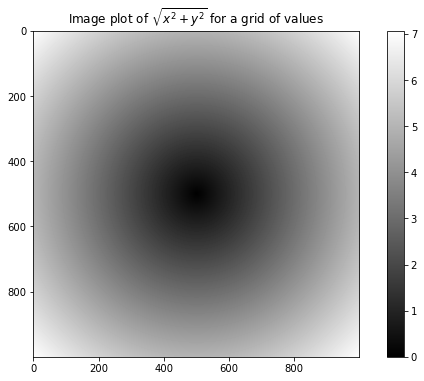

In [24]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [25]:
plt.draw()

<Figure size 720x432 with 0 Axes>

In [26]:
plt.close('all')

### 4.3.1 条件逻辑作为数组操作 Expressing Conditional Logic as Array Operations

numpy.where函数是三元表示式“x if condition else y”的向量化版本。

In [27]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [28]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [29]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [34]:
arr = np.random.randn(4, 4)
arr

array([[ 0.2467, -0.0119,  1.0048,  1.3272],
       [-0.9193, -1.5491,  0.0222,  0.7584],
       [-0.6605,  0.8626, -0.01  ,  0.05  ],
       [ 0.6702,  0.853 , -0.9559, -0.0235]])

In [35]:
arr > 0

array([[ True, False,  True,  True],
       [False, False,  True,  True],
       [False,  True, False,  True],
       [ True,  True, False, False]])

In [36]:
np.where(arr > 0, 2, -2)

array([[ 2, -2,  2,  2],
       [-2, -2,  2,  2],
       [-2,  2, -2,  2],
       [ 2,  2, -2, -2]])

In [37]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[ 2.    , -0.0119,  2.    ,  2.    ],
       [-0.9193, -1.5491,  2.    ,  2.    ],
       [-0.6605,  2.    , -0.01  ,  2.    ],
       [ 2.    ,  2.    , -0.9559, -0.0235]])

### 4.3.2 计算与统计 Mathematical and Statistical Methods

+ 可以对数组对象的整体或某个轴就行统计计算；
+ 这种计算被称为聚合运算（Aggerations）：sum、mean和std等等。

In [38]:
arr = np.random.randn(5, 4)
arr

array([[-2.3042, -0.6525, -1.2183, -1.3326],
       [ 1.0746,  0.7236,  0.69  ,  1.0015],
       [-0.5031, -0.6223, -0.9212, -0.7262],
       [ 0.2229,  0.0513, -1.1577,  0.8167],
       [ 0.4336,  1.0107,  1.8249, -0.9975]])

In [39]:
arr.mean()

-0.12928229996465998

In [40]:
np.mean(arr)

-0.12928229996465998

In [44]:
np.max(arr)

1.824875211346031

In [45]:
np.argmax(arr)

18

In [ ]:
arr.mean()
np.mean(arr)
arr.sum()

In [46]:
arr.sum()

-2.5856459992931997

![图片](4-1.png)

In [49]:
arr

array([[-2.3042, -0.6525, -1.2183, -1.3326],
       [ 1.0746,  0.7236,  0.69  ,  1.0015],
       [-0.5031, -0.6223, -0.9212, -0.7262],
       [ 0.2229,  0.0513, -1.1577,  0.8167],
       [ 0.4336,  1.0107,  1.8249, -0.9975]])

In [48]:
arr.mean(axis=1)  # x轴。固定y轴，沿着x轴(横轴)运算

array([-1.3769,  0.8725, -0.6932, -0.0167,  0.5679])

In [47]:
arr.sum(axis=0)   # y轴。固定x轴，沿着y轴(纵轴)运算

array([-1.0762,  0.511 , -0.7823, -1.2381])

有一些聚合运算，结果并不是一个数，比如cumsum、cumprod。

In [50]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [51]:
arr.cumprod()

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [52]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [53]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [54]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

| 基本统计方法 | 说明 |
| ------ | ------- |
| sum           | 求和 | 
| mean          | 平均数 | 
| std、var      | 标准差、方差 | 
| min、max      | 最小值、最大值 | 
| argmin、argmax         | 最小值、最大值的索引 | 
| maximum、fmax        | 最大值，famx忽略NaN |
| cumsun        | 累加和 |
| cumprod       | 累计乘 |

### 4.3.3 布尔型数组方法 Methods for Boolean Arrays

In [56]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

40

In [57]:
arr > 0

array([False, False, False, False, False,  True,  True,  True,  True,
       False, False,  True,  True,  True, False,  True, False, False,
       False, False, False, False, False,  True,  True, False,  True,
       False,  True, False,  True,  True, False, False,  True, False,
       False,  True,  True,  True,  True, False,  True, False, False,
       False,  True, False, False, False,  True,  True,  True, False,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False, False, False,  True, False, False, False, False,
        True, False,  True, False,  True, False, False, False,  True,
       False,  True,  True, False, False,  True,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False])

In [59]:
bools = np.array([False, False, True, False])
bools.any() #是否有一个True

True

In [60]:
bools.all() #是否全是True

False

### 4.3.4 排序 Sorting

In [61]:
arr = np.random.randn(6)
arr

array([ 1.1413, -0.8671,  0.3836, -0.437 ,  0.3475, -1.2302])

In [62]:
arr.sort() #覆盖
arr

array([-1.2302, -0.8671, -0.437 ,  0.3475,  0.3836,  1.1413])

In [63]:
arr = np.random.randn(5, 3)
arr
arr.sort(1) #对编号1的轴排序，即x轴。
arr

array([[-0.2255,  0.0601,  0.5711],
       [-0.3867,  1.3497,  1.3503],
       [-1.4102,  0.866 ,  1.7472],
       [-0.3782, -0.3458,  0.3801],
       [-2.2646,  0.189 ,  1.3233]])

In [65]:
arr.sort(axis = 1)
arr

array([[-0.2255,  0.0601,  0.5711],
       [-0.3867,  1.3497,  1.3503],
       [-1.4102,  0.866 ,  1.7472],
       [-0.3782, -0.3458,  0.3801],
       [-2.2646,  0.189 ,  1.3233]])

这里介绍一个快速但不精确的计算5%分位数的方法。

In [66]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.5308984278773312

### 4.3.5 唯一化与集合逻辑 Unique and Other Set Logic

In [67]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [68]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [69]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [70]:
# 检查某个1D数组里的元素，是否也在另一个数组之中
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

| 方法 | 说明 |
| ------ | ------- |
| unique(x)    | x中的唯一元素，并返回数组结果 | 
| intersect1d(x,y)          | x,y中的交集 | 
| union1d(x,y)      | x,y中的并集 | 
| in1d(x,y)      | x中的元素是否在y中 | 
| setdiff1d(x,y)        | x和y的差集 | 
| setxor1d(x,y)        | x和y的对称差 |

## 4.4 （略）用数组进行文件输入和输出 File Input and Output with Arrays

大部分数据的输入和输出会用pandas，以及以其他一些途径，所以这里只讲一些简单应用。

In [ ]:
arr = np.arange(10)
np.save('some_array', arr)

In [ ]:
np.load('some_array.npy')

In [ ]:
np.savez('array_archive.npz', a=arr, b=arr)

In [ ]:
arch = np.load('array_archive.npz')
arch['b']

In [ ]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

In [ ]:
!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

## 4.5 线性代数 Linear Algebra

In [75]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [76]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [77]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [78]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [79]:
np.ones(3)

array([1., 1., 1.])

In [80]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [81]:
x @ np.ones(3)

array([ 6., 15.])

Numpy有一个专门处理线性代数的包numpy.linalg。

In [ ]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)
mat.dot(inv(mat))
q, r = qr(mat)
r

In [88]:
from numpy.linalg import inv, qr

In [85]:
X = np.random.randn(5, 5)
mat = X.T.dot(X)
mat

array([[ 2.0427, -2.1166,  0.5541,  1.5204,  1.9658],
       [-2.1166,  3.4413, -1.6156, -1.1042, -0.2126],
       [ 0.5541, -1.6156,  4.6429,  1.4489, -2.7581],
       [ 1.5204, -1.1042,  1.4489,  3.2461, -0.4407],
       [ 1.9658, -0.2126, -2.7581, -0.4407,  8.6744]])

In [90]:
inv(mat)

array([[28.8894, 14.6515,  0.9176, -9.8253, -6.3952],
       [14.6515,  7.8179,  0.6127, -4.9088, -3.1833],
       [ 0.9176,  0.6127,  0.3943, -0.4094, -0.0883],
       [-9.8253, -4.9088, -0.4094,  3.7169,  2.1649],
       [-6.3952, -3.1833, -0.0883,  2.1649,  1.5684]])

| 常用的numpy.linalg函数 | 说明 |
| ------     | ------- |
| diag       | 返回矩阵对角线 | 
| dot        | 矩阵乘法 | 
| trace      | 迹，对角线元素的和 | 
| det        | 行列式 | 
| eig        | 特征值和特征向量 | 
| inv        | 逆 |
| pinv       | Moore-Penrose伪逆 | 
| qr         | QR分解 | 
| svd        | SVD分解 | 
| solve      | 解线性方程组Ax=b，其中A是方阵 | 
| lstsq      | 计算Ax=b的最小二乘解 | 

## 4.6 伪随机数 Pseudorandom Number Generation

In [93]:
samples = np.random.normal(size=(4, 4))
samples

array([[-0.7382,  0.3918,  1.7634, -0.0546],
       [-0.6565, -1.5501, -0.0443,  0.6815],
       [-0.9537, -1.857 ,  0.4495, -0.0617],
       [ 1.2339,  0.7058, -1.3091, -1.5374]])

In [95]:
samples_2 = np.random.randn(4,4)
samples_2

array([[ 0.4399, -0.8238, -0.5209,  0.3503],
       [ 0.2044,  0.1334,  0.3279,  0.0722],
       [ 0.1317, -1.2975,  0.9977,  0.871 ],
       [-0.9913,  0.1517,  1.2662, -0.2025]])

In [96]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

489 ms ± 15.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
15.8 ms ± 164 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [97]:
np.random.seed(1234)

In [98]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.4714, -1.191 ,  1.4327, -0.3127, -0.7206,  0.8872,  0.8596,
       -0.6365,  0.0157, -2.2427])

| 常用的numpy.random函数 | 说明 |
| ------     | ------- |
| seed       | 确定随机数生成器的种子 | 
| permutation  | 返回一个序列排列的范围 | 
| shuffle      | 对一个序列进行随机排列 | 
| rand         | 产生均匀分布的样本值 | 
| randint      | 在给定范围内随机取整数 | 
| randn        | 产生标准正态分布的样本值 |
| binomial     | 产生二项分布的样本值 | 
| normal       | 产生正态分布的样本值 | 
| beta         | 产生beta分布的样本值 | 
| schisquare   | 产生卡方分布的样本值 | 
| gamma        | 产生Gamma分布的样本值 | 
| uniform      | 产生[0, 1]均匀分布的样本值 |

## 4.7 案例：随机游走 Example: Random Walks

在纯Python下做

In [99]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [102]:
walk

[0,
 -1,
 -2,
 -1,
 0,
 -1,
 -2,
 -1,
 -2,
 -1,
 -2,
 -1,
 0,
 -1,
 -2,
 -1,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 -1,
 0,
 1,
 2,
 1,
 0,
 -1,
 -2,
 -1,
 -2,
 -1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 -1,
 -2,
 -3,
 -4,
 -5,
 -6,
 -7,
 -6,
 -5,
 -4,
 -3,
 -4,
 -5,
 -4,
 -5,
 -4,
 -3,
 -2,
 -3,
 -4,
 -3,
 -2,
 -3,
 -2,
 -1,
 0,
 -1,
 0,
 1,
 2,
 1,
 0,
 -1,
 -2,
 -1,
 0,
 1,
 2,
 3,
 2,
 1,
 0,
 -1,
 -2,
 -3,
 -2,
 -1,
 -2,
 -1,
 0,
 -1,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 3,
 4,
 3,
 4,
 3,
 4,
 5,
 4,
 5,
 6,
 7,
 8,
 7,
 8,
 7,
 8,
 9,
 10,
 9,
 10,
 11,
 12,
 13,
 12,
 11,
 10,
 11,
 10,
 11,
 12,
 13,
 12,
 13,
 12,
 13,
 14,
 13,
 14,
 15,
 14,
 13,
 12,
 13,
 12,
 11,
 12,
 11,
 12,
 13,
 12,
 11,
 10,
 11,
 10,
 11,
 12,
 13,
 14,
 13,
 14,
 13,
 12,
 11,
 10,
 9,
 10,
 11,
 12,
 13,
 12,
 13,
 12,
 11,
 10,
 11,
 10,
 11,
 12,
 11,
 12,
 13,
 12,
 13,
 12,
 13,
 12,
 11,
 12,
 13,
 14,
 15,
 14,
 15,
 16,
 15,
 16,
 15,
 16,
 15,
 16,
 17,
 16,
 15,
 14,
 15,
 14,
 13,
 12,
 11,
 12,
 11,
 12,
 13,
 1

In [100]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

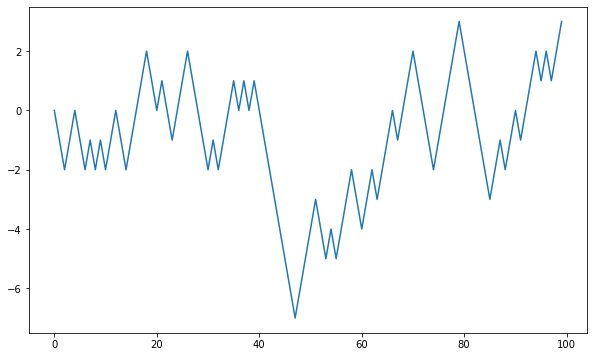

In [101]:
plt.plot(walk[:100])

在Numpy下做

In [103]:
np.random.seed(12345)

In [105]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [107]:
walk

array([-1,  0,  1,  2,  1,  2,  1,  0,  1,  0,  1,  2,  1,  2,  3,  2,  3,
        4,  5,  4,  3,  2,  3,  4,  5,  4,  5,  4,  3,  4,  5,  6,  7,  8,
        7,  8,  9, 10, 11, 12, 13, 12, 11, 12, 13, 12, 11, 12, 13, 14, 15,
       14, 15, 16, 17, 18, 17, 18, 19, 18, 19, 18, 17, 18, 19, 20, 19, 18,
       19, 18, 19, 18, 17, 16, 17, 18, 17, 16, 15, 14, 13, 12, 13, 12, 11,
       10, 11, 10,  9, 10, 11, 12, 13, 14, 15, 14, 13, 12, 13, 12, 11, 12,
       11, 12, 11, 12, 11, 10,  9, 10, 11, 10,  9, 10,  9, 10,  9,  8,  9,
       10,  9, 10, 11, 10,  9, 10,  9,  8,  9, 10, 11, 12, 11, 10,  9, 10,
        9, 10,  9,  8,  9, 10,  9, 10,  9, 10,  9, 10, 11, 12, 11, 12, 11,
       10,  9, 10, 11, 10,  9,  8,  7,  6,  5,  6,  7,  8,  7,  6,  7,  6,
        7,  6,  7,  6,  5,  6,  7,  6,  7,  8,  7,  8,  9,  8,  7,  8,  7,
        6,  7,  8,  9, 10,  9, 10, 11, 10, 11, 12, 13, 12, 11, 10,  9,  8,
        9, 10, 11, 10,  9, 10,  9, 10,  9, 10,  9,  8,  7,  6,  7,  6,  5,
        6,  7,  8,  7,  6

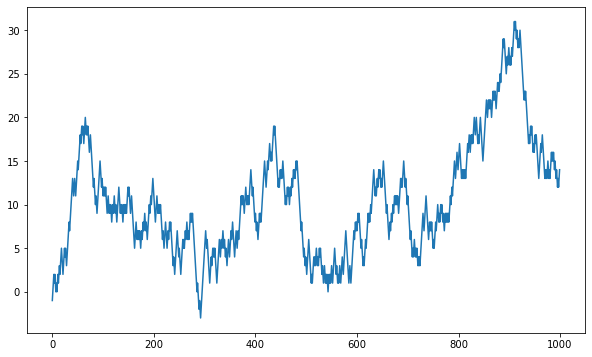

In [108]:
plt.plot(walk)

In [112]:
walk.min()

-3

In [110]:
walk.max()

31

超过10的时点的第一个时点

In [113]:
(np.abs(walk) >= 10).argmax()

37

### 模拟多个随机游走 Simulating Many Random Walks at Once

In [114]:
nwalks = 5000 #一次产生5000条随机数
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]], dtype=int32)

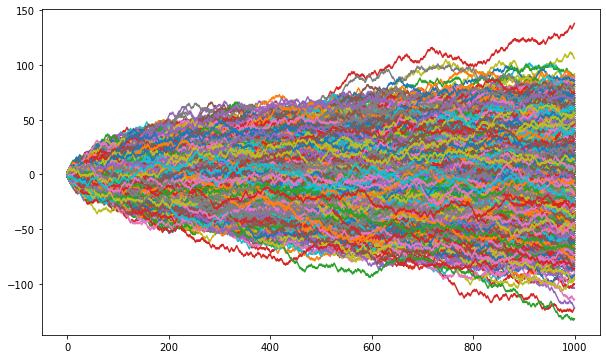

In [115]:
for i in range(5000):
    plt.plot(walks[i, : ])

In [ ]:
walks.max()
walks.min()

In [ ]:
hits30 = (np.abs(walks) >= 30).any(1) # 1指的是按照编号1的轴
hits30
hits30.sum() # Number that hit 30 or -30

In [ ]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

当然也可以在正态分布里找随机数

In [ ]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))

## Conclusion